### ЗАДАНИЕ


    Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)
    
    Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей
    
    Построить случайный лес, вывести важность признаков
    
    Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
    
    Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии
    
    Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)
    
    В качестве решения: Jupyter notebook с кодом, комментариями и графиками


In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dir(data)

['Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'Sal

In [6]:
pd.DataFrame(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
prices=data[[ 'BldgType', 'HouseStyle', 'Neighborhood']]
prices

,BldgType,HouseStyle,Neighborhood
0,1Fam,2Story,CollgCr
1,1Fam,1Story,Veenker
2,1Fam,2Story,CollgCr
3,1Fam,2Story,Crawfor
4,1Fam,2Story,NoRidge
...,...,...,...
1455,1Fam,2Story,Gilbert
1456,1Fam,1Story,NWAmes
1457,1Fam,2Story,Crawfor
1458,1Fam,1Story,NAmes


In [8]:
house_data = data[['YearBuilt', 'LotArea', 'OverallCond',]]

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BldgType      1460 non-null   object
 1   HouseStyle    1460 non-null   object
 2   Neighborhood  1460 non-null   object
dtypes: object(3)
memory usage: 34.3+ KB


In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   YearBuilt    1460 non-null   int64
 1   LotArea      1460 non-null   int64
 2   OverallCond  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
h_d = prices.apply(le.fit_transform)
h_d

,BldgType,HouseStyle,Neighborhood
0,0,5,5
1,0,2,24
2,0,5,5
3,0,5,6
4,0,5,15
...,...,...,...
1455,0,5,8
1456,0,2,14
1457,0,5,6
1458,0,2,12


In [14]:
h_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BldgType      1460 non-null   int32
 1   HouseStyle    1460 non-null   int32
 2   Neighborhood  1460 non-null   int32
dtypes: int32(3)
memory usage: 17.2 KB


<AxesSubplot:>

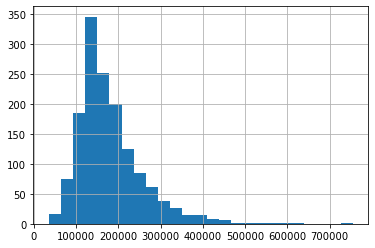

In [15]:
data['SalePrice'].hist(bins=25)

C:\Users\Bruker\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

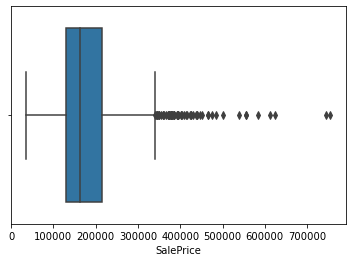

In [16]:
sns.boxplot(data['SalePrice'])

In [17]:
h_d

,BldgType,HouseStyle,Neighborhood
0,0,5,5
1,0,2,24
2,0,5,5
3,0,5,6
4,0,5,15
...,...,...,...
1455,0,5,8
1456,0,2,14
1457,0,5,6
1458,0,2,12


In [18]:
X = pd.concat([h_d, house_data], axis=1)

In [19]:
X

,BldgType,HouseStyle,Neighborhood,YearBuilt,LotArea,OverallCond
0,0,5,5,2003,8450,5
1,0,2,24,1976,9600,8
2,0,5,5,2001,11250,5
3,0,5,6,1915,9550,5
4,0,5,15,2000,14260,5
...,...,...,...,...,...,...
1455,0,5,8,1999,7917,5
1456,0,2,14,1978,13175,6
1457,0,5,6,1941,9042,9
1458,0,2,12,1950,9717,6


In [20]:
y = data['SalePrice']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [23]:
X_train.shape, y_train.shape

((1168, 6), (1168,))

In [24]:
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

###### необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

In [25]:
from sklearn.model_selection import KFold


In [26]:
kf = KFold(n_splits=10)

In [28]:
for train, test in kf.split(X):
    print('train: %s, test: %s' % (train, test))
    #print("%s %s" % (train, test))

train: [ 146  147  148 ... 1457 1458 1459], test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145]
train: [   0    1    2 ... 1457 1458 1459], test: [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 2

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [ ]:
#scores = cross_val_score(clf, X, y, cv=10)

In [31]:
model = svm.SVC()

In [32]:
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print(accuracy)

C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.01369863 0.01369863 0.01369863 0.02054795 0.01369863 0.01369863
 0.02054795 0.02054795 0.01369863 0.01369863]


In [34]:
print("Точность модели с Кросс-Валидацией CV :",accuracy.mean() * 100)

Точность модели с Кросс-Валидацией CV : 1.5753424657534245


### Построить случайный лес, вывести важность признаков

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [40]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [41]:
sel.get_support()

array([False, False, False,  True,  True, False])

In [42]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

2

In [66]:
print('Важные признаки : ', selected_feat)

Важные признаки :  Index(['YearBuilt', 'LotArea'], dtype='object')


In [52]:
forest_importances = pd.Series(sel, index=selected_feat)

In [58]:
X.shape[1]

6

In [60]:
print(selected_feat)

Index(['YearBuilt', 'LotArea'], dtype='object')


In [61]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [62]:
import time

In [63]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.052 seconds


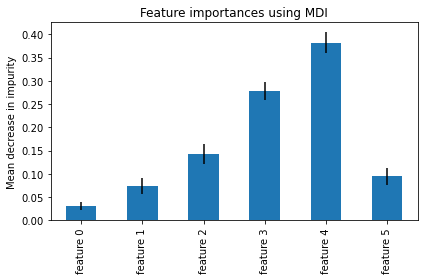

In [64]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### бучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

######  Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [69]:
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [71]:
regr.predict(X)

array([205352.73553233, 132578.2406981 , 228120.49154034, ...,
       131221.99371009, 132578.2406981 , 132578.2406981 ])

In [77]:
print(regr.predict([[0, 0, 0, 0, 0, 0]]))

[131221.99371009]


######  Lasso Regression (Lasso)

In [74]:
from sklearn import linear_model

In [75]:
clf = linear_model.Lasso(alpha=0.1)

In [79]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [80]:
print(clf.coef_)

[-9.85346717e+03  1.63504937e+03  1.93020165e+03  1.50442399e+03
  1.75581331e+00  8.60203182e+03]


In [81]:
print(clf.intercept_)

-2874882.487835702


###### non-linear Nearest Neighbors

In [114]:
from sklearn.neighbors import NearestNeighbors

In [91]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)

In [92]:
distances, indices = nbrs.kneighbors(X)

In [93]:
indices

array([[   0,  958,  216, ...,  464,  419,  262],
       [   1,  849,  455, ..., 1261,  627, 1371],
       [   2,  983,  683, ...,  447, 1210,  824],
       ...,
       [1457, 1384,  182, ...,  352,  601,  916],
       [1458, 1185,  813, ..., 1101, 1117,  862],
       [1459,  659,  679, ...,  226,  792,  927]], dtype=int64)

In [94]:
distances

array([[ 0.        ,  3.        ,  3.16227766, ..., 32.15587038,
        35.83294573, 36.34556369],
       [ 0.        ,  5.09901951, 10.63014581, ..., 23.40939982,
        24.77902339, 24.77902339],
       [ 0.        ,  1.        ,  3.74165739, ..., 36.24913792,
        36.46916506, 38.02630668],
       ...,
       [ 0.        , 19.23538406, 24.4744765 , ..., 42.41462012,
        42.69660408, 43.38202393],
       [ 0.        , 33.86738844, 33.95585369, ..., 46.07602413,
        50.47771786, 56.97367813],
       [ 0.        ,  1.41421356, 15.        , ..., 33.80828301,
        36.3868108 , 37.90778284]])

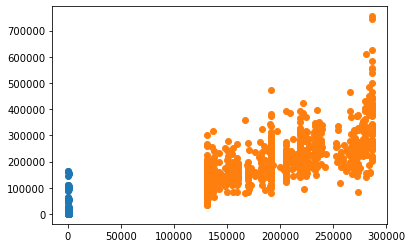

In [113]:
plt.scatter(indices, distances, )
plt.scatter(regr.predict(X), y)


In [121]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

In [122]:
estimators = [
    ('lr', RidgeCV()),
     ('svr', LinearSVR(random_state=42))
        ]

In [123]:
reg = StackingRegressor(estimators=estimators,
                       final_estimator=RandomForestRegressor(n_estimators=10,
                                                            random_state=42)
                       )

In [127]:
steck=reg.fit(X_train, y_train).score(X_test, y_test)
print('Стек с финальным регрессором  ', steck)

C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

Стек с финальным регрессором   0.3078294926838542


C:\Users\Bruker\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Сравниваем стэкинг с кросс-валидацией

In [132]:
print('Стек с финальным регрессором  ', steck)
print("Точность модели с hold-out :",accuracy.mean() * 100)

Стек с финальным регрессором   0.3078294926838542
Точность модели с hold-out : 1.5753424657534245
